In [1]:
from PreFRBLE.likelihood import *
from PreFRBLE.plot import *


### Identify  intervening galaxies
Here we attempto to identify LoS with intervening galaxies.
For this purpose, we compare the likelihood of temporal broadening $L(\tau)$ for scenarios with and without intervening galaxies, as well as consider a scenario that realistically considers the probability for LoS to intersect an additoinal galaxy.

In [2]:
properties_benchmark = {  ## this is our benchmark scenario, fed to procedures as kwargs-dict of models considered for the different regions are provided as lists (to allow to consider multiple models in the same scenario, e. g. several types of progenitors. Use mixed models only when you kno what you are doing)
    'redshift' : 0.1, ## Scenario must come either with a redshift or a pair of telescope and redshift population
    'IGM' : ['primordial'],       ## constrained numerical simulation of the IGM (more info in Hackstein et al. 2018, 2019 & 2020 )
    'Host' : ['Rodrigues18'],     ## ensemble of host galaxies according to Rodrigues et al . 2018
#    'Inter' : ['Rodrigues18'],    ## same ensemble for intervening galaxies
    'Local' : ['Piro18_wind'],    ## local environment of magnetar according to Piro & Gaensler 2018
#    'N_inter' : True, ## if N_Inter = True, then intervening galaxies are considered realistically, i. e. according to the expected number of intervened LoS N_inter
    'f_IGM' : 0.9,   ## considering baryon content f_IGM=0.9
}


## define our benchmark scenario without intervening galaxies
scenario_nointer = Scenario( **properties_benchmark )

## only LoS with a single intervening galaxy at rendom redshift, according to prior
scenario_inter = Scenario( Inter='Rodrigues18', **properties_benchmark )

## realistic mix of LoS with and without intervening galaxies, according to expectation from intersection probability
scenario_realistic = Scenario( N_inter=True, Inter='Rodrigues18', **properties_benchmark )




### compare likelihoods
First, we compare the distribution of $\tau$ expected to be observed by ASKAP, CHIME and Parkes.
For easier interpretation we plot the complementary cumulative likelihood $P(>\tau)$, that shows how many $\tau$ are obseved above the given value

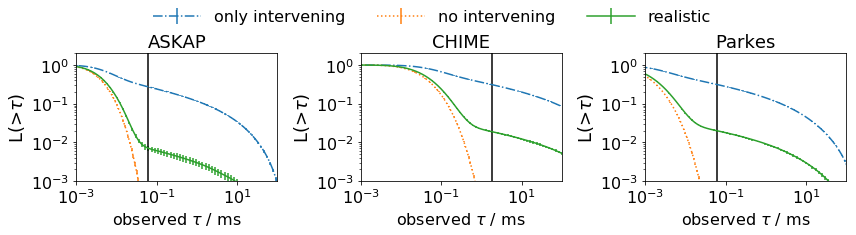

In [4]:
tau_dist = {
    'ASKAP_incoh' : 0.06,
    'Parkes' : 0.06,
    'CHIME' : 1.8
    
}


fig, axs = plt.subplots( 1, len(telescopes), figsize=(4*len(telescopes), 3) )
#fig, axs = plt.subplots( len(telescopes), 1, figsize=(4, len(telescopes)* 3) )

population = 'SMD'
scenarios = [scenario_inter, scenario_nointer,scenario_realistic]
scenario_labels = ['only intervening', 'no intervening', 'realistic']
linestyles = ['-.', ':', '-']
for telescope, ax in zip( telescopes, axs):
    for i_s, scenario in enumerate(scenarios):
        tmp = Scenario( population=population, telescope=telescope, **scenario.Properties( identifier=False ) )
        L = GetLikelihood( 'tau', tmp )
        L.Plot( ax=ax, deviation=True, label=scenario_labels[i_s], linestyle=linestyles[i_s], cumulative=-1 )
#        P = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', dev=True, **scenario )
#        PlotLikelihood( *P, ax=ax, label=scenario_labels[i_s], linestyle=linestyles[i_s], measure='tau' , cumulative=-1 )#density=True )
    ax.set_title(labels[telescope], fontsize=18)
    ax.set_ylim(1e-3,2)
    ax.set_xlim(1e-3, 1e2)
    if telescope == telescopes[0]:
        fig.legend(loc='center', bbox_to_anchor= (.5, 1.01), ncol=3, borderaxespad=0, frameon=False, fontsize=16, handlelength=3 )

    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.vlines( tau_dist[telescope], 1e-4,10 )
    
#    AllSidesTicks(ax)
#for i in range(3):
#    axs[i].legend(fontsize=16, loc=4+i)

#axs[1].legend(fontsize=14, loc=1)
fig.tight_layout()

### Bayes factor & Posterior
calculate bayes factor $\mathcal{B}$ as ratio of the two likelihood functions shown above.
To obtain the posterior likelihood $L(\tau)$ for an $\tau$ to mark a LoS with an intervening galaxy, we have to multiply $\mathcal{B}$ by the ratio of prior likelihoods $\pi_{\rm inter}$, i. e. the ratio of expected amount of LoS with and without LoS.
This amount can be found via
$$
\pi_{\rm inter} = \int N_{\rm Inter}(z) \pi(z) \text{d}z .
$$

For $L(\tau)>10^2$, the LoS is intersected by an intervening galaxy with >99% certainty.

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


ASKAP_incoh: 2.5% of LoS have intervening galaxy


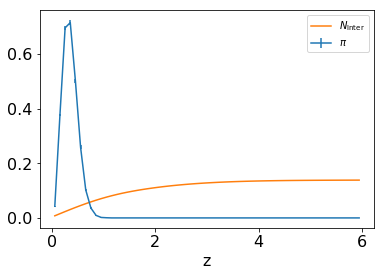

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


CHIME: 5.9% of LoS have intervening galaxy


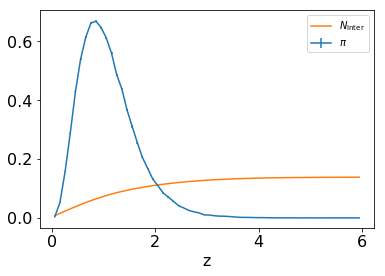

Parkes: 6.2% of LoS have intervening galaxy


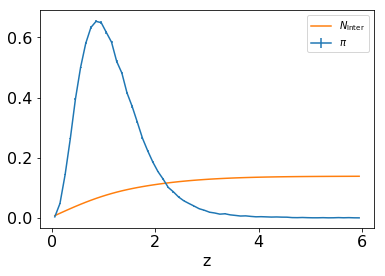

In [4]:
## first determine amount of intervened LoS

telescope = 'Parkes'
populations = 'SMD'
for telescope in telescopes:

    scenario = Scenario( telescope=telescope, population=population )
    L = GetLikelihood( 'z', scenario )
#    Pz = GetLikelihood_Redshift(  telescope=telescope, population=population )

    N_Inter = np.cumsum(nInter(redshift=redshift_range[-1]))

    pi_inter = np.sum( N_Inter * L.Probability() )
    
    ##plot results
    fig, ax = plt.subplots()
    L.Plot( ax=ax, label=r"$\pi$" )
    
#    PlotLikelihood( *Pz, log=False, measure='z', ax=ax, label=r"$\pi$" )
    ax.plot( L.x_central(), N_Inter, label=r"$N_{\rm Inter}$" )

    print( "{}: {:.1f}% of LoS have intervening galaxy".format( telescope, 100*pi_inter ) )

    ax.set_ylabel('')
    ax.legend()
    plt.show()

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5
/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:202: RuntimeWarning: divide by zero encountered in true_divide
  bayes =  P1/P2
/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:202: RuntimeWarning: invalid value encountered in true_divide
  bayes =  P1/P2


8 of 53 returned NaN. Ignore in final result
ASKAP_incoh: decisive for intervening galaxies: tau>0.059 ms
ASKAP_incoh, 26.827211 % of interveners identified
ASKAP_incoh, 0.002646 % of others give false positives
1 of 53 returned NaN. Ignore in final result
CHIME: decisive for intervening galaxies: tau>1.768 ms
CHIME, 30.568578 % of interveners identified
CHIME, 0.000275 % of others give false positives
Parkes: decisive for intervening galaxies: tau>0.059 ms
Parkes, 30.849642 % of interveners identified
Parkes, 0.000255 % of others give false positives


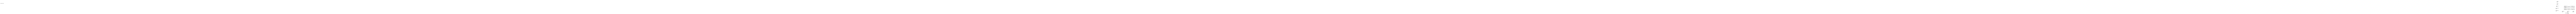

In [6]:
## Compute and plot posterior likelihood of $\tau$ to indicate an intervening galaxy

fig, ax = plt.subplots( figsize=(5,3))

population = 'SMD'

#for telescope, ax in zip( telescopes, axs):
for telescope, color, linestyle in zip(telescopes, colors_telescope, linestyles_population):
    
    L_i = GetLikelihood( 'tau', Scenario( population=population, telescope=telescope, **scenario_inter.Properties( identifier=False ) ) )
    L = GetLikelihood( 'tau', Scenario( population=population, telescope=telescope, **scenario_nointer.Properties( identifier=False ) ) )

    ## force both P to same range
    
    ## give both P ranges the same min and max
    x_max = np.min( [L.x[-1],L_i.x[-1]] )
    x_min = np.max( [L.x[0],L_i.x[0]] )
    L_i.Measureable( min=x_min, max=x_max )
    L.Measureable( min=x_min, max=x_max, bins=L_i.P.size ) ### use identical bins
    
    ## check if successfull
    if not np.all(L.x == L_i.x):
        print("try harder!")
        print(P[1], P_i[1])
        break
#    """
    
    B = BayesFactors( P1=L_i.P, P2=L.P )
    dev_B =  np.sqrt( L_i.dev**2 + L.dev**2 )
    
    ## obtain prior
    
    Lz = GetLikelihood( 'z', Scenario( population=population, telescope=telescope ) )
    
#    Pz = GetLikelihood_Redshift(  telescope=telescope, population=population )
    N_Inter = np.cumsum(nInter())
    pi_inter = np.sum( N_Inter * Lz.Probability() )

    ## compute posterior
    B *= pi_inter/(1-pi_inter)
    
    try:
        i_tau = first( range(len(B)), lambda i: B[i] > 1e2 )
    except:
        print( "could not find L>100")
    ## highest value of P_nointer>0
        i_tau = -1  ### by construction, last value
#    print( "B_last {} at {}".format( B[i_tau],i_tau) )
        
    tau_decisive = L.x[1:][i_tau]
    print( "{}: decisive for intervening galaxies: tau>{:.3f} ms".format(telescope,tau_decisive))

    ## better aestethics for results with P = 0
    B[B==1] = B[B!=1][-1] * 10.**np.arange(sum(B==1))
    
    ax.errorbar( L.x[1:], B, yerr=B*dev_B, label=r"%s, $\tau_{\rm decisive} = %.2f$ ms" % (labels[telescope], tau_decisive), color=color, linestyle=linestyle )
    ax.set_xlabel( r"$\tau$ / ms", fontdict={'size':18 } )
    ax.set_ylabel( r"$L$", fontdict={'size':18 }  )
#    ax.set_ylabel( r"$\mathcal{B}$", fontdict={'size':18 }  )

    
    ## compute how many LoS with intervening galaxies are identified / false positives
    
    ### reload the shrinked likelihood functions
    L_i = GetLikelihood( 'tau', Scenario( population=population, telescope=telescope, **scenario_inter.Properties( identifier=False ) ) )
    L = GetLikelihood( 'tau', Scenario( population=population, telescope=telescope, **scenario_nointer.Properties( identifier=False ) ) )

    #P_i, x_i = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', **scenario_inter )
    #P, x = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', **scenario_nointer )

    i_tau = first( range(len(L_i.P)), lambda i: L_i.x[i] > tau_decisive )
    print( "%s, %.6f %% of interveners identified" % ( telescope, 100*np.sum( L_i.Probability()[i_tau:]  ) ) )

    try:
        i_tau = first( range(len(L.P)), lambda i: L.x[i] > tau_decisive )
    except: ## fails, if chosen  highest value of noInter
        i_tau = -1
    print( "%s, %.6f %% of others give false positives" % ( telescope, 100*np.sum( L.Probability()[i_tau:] ) ) )

ax.legend(loc='lower right', fontsize=14)
ax.loglog()
#ax.set_xlim(1e-2,1e2)
ax.set_ylim(1e-16,1e11)
PlotLimit(ax=ax, x=ax.get_xlim(), y=[1e2,1e2], lower_limit=True, label='decisive', shift_text_vertical=3e3, shift_text_horizontal=-0.95)
ax.tick_params(axis='both', which='major', labelsize=16)
#AllSidesTicks(ax)
#    """
    

### compare to FRBcat
How many FRBs in FRBcat show $\tau > \tau_{\rm dist}$?
How many do we expect?

In [7]:
tau_dist = {
    'ASKAP_incoh' : 0.06,
    'Parkes' : 0.06,
    'CHIME' : 1.8
    
}

population='SMD'

for telescope in telescopes:
    FRBs = GetFRBcat( telescopes=[telescope])
    N_tau = sum(FRBs['tau'] > tau_dist[telescope]) 
    N_tot = len(FRBs)

    print("{}: {} of {}  > {} ms, {:.2f}%".format(telescope, N_tau, N_tot, tau_dist[telescope], 100*N_tau/N_tot))

    scenario = Scenario( telescope=telescope, population=population, **scenario_realistic.Properties( identifier=False ) )
    L = GetLikelihood( 'tau', scenario )
    
#    L = GetLikelihood_Telescope( measure='tau', telescope=telescope, population=population, **scenario_inter_realistic)
    ix = first( range(len(L.P)), lambda i: L.x[i] >= tau_dist[telescope] )
#    ix = np.where(L.x >= tau_dist[telescope])[0][0]
    print( "expected: {:.2f} %  > {} ms".format( 100*L.Cumulative(-1)[ix], tau_dist[telescope] ) )

    

ASKAP_incoh: 1 of 28  > 0.06 ms, 3.57%
expected: 0.66 %  > 0.06 ms
CHIME: 6 of 30  > 1.8 ms, 20.00%
expected: 1.81 %  > 1.8 ms
Parkes: 13 of 27  > 0.06 ms, 48.15%
expected: 1.92 %  > 0.06 ms


In [19]:
L.scenario.Key(measure='tau')

'Parkes/SMD/Rodrigues18/primordial/Rodrigues18_NInter/Piro18_wind/tau'

### How many tau > 0.06 ms observed by Parkes can intervening galaxies account for?

In [8]:
pi_I = 0.0192 ## expected amount of LoS with tau > 0.06 ms (all from intervening)
P_I = 0.4815  ## observed amount of tau > 0.06 ms, derived above
print( "{:.2f} %".format(100*pi_I/P_I) )

3.99 %


What about the other regions?

### outer scale of turbulence $L_0$
The observed values of $\tau$ from the IGM highly depend on the choice for $L_0$, whose true value is sparsely constrained, from few parsec to the Hubble scale.
In our estimates, we assume constant $L_0 = 1 ~\rm Mpc$, a value expected from results by Ryu et al. 2008.
The choice of constant $L_0$ allows for different choices in post processing.
Simplye add a "L0" keyword with the required number in kpc.



1.92 %  > 0.06 ms for L0 = 1 Mpc
cannot find thus have to compute {'Host': ['Rodrigues18'], 'Inter': ['Rodrigues18'], 'IGM': ['primordial'], 'Local': ['Piro18_wind']}: 0.1/Rodrigues18/primordial_L00kpc/Rodrigues18_NInter/Piro18_wind/tau


NameError: name 'kwargs' is not defined

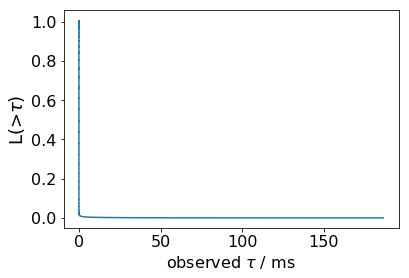

In [11]:
scenario_IGM = {
    'IGM' : ['primordial'],
}

scenario_ref = Scenario( telescope='Parkes', population='SMD', **scenario_realistic.Properties( identifier=False ) )
#scenario_ref = scenario_IGM


tmp = scenario_ref.copy()
tmp.IGM_outer_scale = 0.005

measure='tau'

cumulative = -1
fig, ax = plt.subplots()
L = GetLikelihood( measure, scenario_ref  )
L.Plot( ax=ax, cumulative=cumulative )
#PlotLikelihood( *L, measure=measure, ax=ax, cumulative=cumulative)

try:
    ix = first( range(len(L.P)), lambda i: L.x[i] > 0.06 )
    print( "{:.2f} %  > 0.06 ms for L0 = 1 Mpc".format( 100*L.Cumulative(-1)[ix] ) )
except:
    print( "0  > 0.06 ms for L0 = 1 Mpc")

L = GetLikelihood( measure=measure, scenario=tmp, force=tmp.IGM_outer_scale<1, )  ### L0 < 1 kpc all have same keyword in likelihood file !!! CHANGE THAT
L.Plot( ax=ax, cumulative=cumulative )
#PlotLikelihood( *L, measure=measure, ax=ax, cumulative=cumulative)

ix = first( range(len(L.P)), lambda i: L.x[i] > 0.06 )
print( "{:.2f} %  > 0.06 ms  for L0 = {} kpc".format( 100*np.cumsum((L[0]*np.diff(L[1]))[::-1])[::-1][ix], tmp['L0'] ) )


ax.set_ylim(1e-3,1)



The results above show that very low values of $L_0<5 ~\rm pc$ are required for the IGM.
It is thus more likely that a different model for the source environment can explain the high amount of $\tau > 0.06 ~\rm  ms$ observed by Parkes